In [7]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read in data files
city_data = pd.read_csv('./data/city_data.csv')
ride_data = pd.read_csv('./data/ride_data.csv')

print(city_data.head())
print(city_data.shape)
print(ride_data.head())
print(ride_data.shape)

print(city_data['city'].value_counts()[:10])
print(ride_data['city'].value_counts()[:10])

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
(120, 3)
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344
(2375, 4)
New Olivia         1
Grahamburgh        1
Joneschester       1
Reynoldsfurt       1
East Kentstad      1
Lewishaven         1
West Josephberg    1
West Kimmouth      1
Taylorhaven        1
Valentineton       1
Name: city, dtype: int64
West Angela            39
South Karenland        38
North Jason            35
Liumouth               33
Port Frank             33
West

In [65]:
# Merge datasets on city
data = ride_data.merge(city_data, on='city')
print(data.head())
print(data.shape)
print(data.type.value_counts())

                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  Lake Jonathanshire  2018-04-07 20:51:11  31.25  4441251834598   
2  Lake Jonathanshire  2018-03-09 23:45:55  19.89  2389495660448   
3  Lake Jonathanshire  2018-04-07 18:09:21  24.28  7796805191168   
4  Lake Jonathanshire  2018-01-02 14:14:50  13.89   424254840012   

   driver_count   type  
0             5  Urban  
1             5  Urban  
2             5  Urban  
3             5  Urban  
4             5  Urban  
(2375, 6)
Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64


### Bubble Plot of Ride Sharing Data

In [70]:
# Group data by city type
city_groups = data.groupby('city')
urban_group = data[data.type == 'Urban'].groupby('city') # one df per city type since each will be a separate scatterplot
suburban_group = data[data.type == 'Suburban'].groupby('city')
rural_group = data[data.type == 'Rural'].groupby('city')

num_drivers['Richardfort']

38

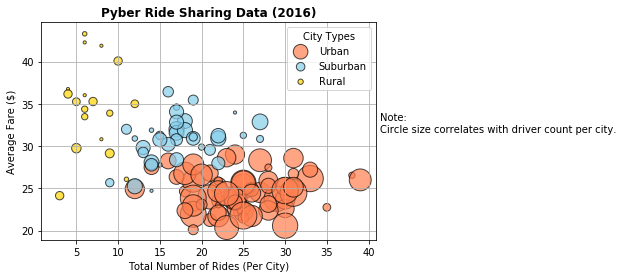

In [92]:
fig, ax = plt.subplots()

# Color based on city type
def add_color(city_type):
    if city_type == 'Rural':
        return 'gold'
    elif city_type == 'Suburban':
        return 'skyblue'
    elif city_type == 'Urban':
        return 'coral'

# Map label to data
grp_map = {
    'Urban':urban_group,
    'Suburban':suburban_group,
    'Rural':rural_group}

# Plot
for label,group in grp_map.items():

    num_rides = group['ride_id'].count()
    num_drivers = group['driver_count'].max()
    avg_fare = group['fare'].mean()
    city_type = group['type'].max()
    
    colors = [add_color(t) for t in city_type]

    ax.scatter(
        num_rides, 
        avg_fare, 
        color=colors, 
        s=num_drivers*10, 
        alpha = .7,
        edgecolors = 'k',
        label=label)

ax.legend(markerscale=.75, title='City Types')

ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data (2016)", fontweight='bold')

note_text = 'Note:\nCircle size correlates with driver count per city.'

fig.text(.91, 0.5, note_text, fontsize=10)

ax.grid()